In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Data Science-Self\ML\Regression\Algerian Forest Fire\dataset\Algerian_forest_fires_dataset.csv",header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [4]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
data[data.isnull()==False] # returns the row with atleast one missing value

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
data.loc[:122,'Reigon']=0
data.loc[122:,'Reigon']=1

In [7]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reigon
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reigon
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [9]:
data[data.isnull().any(axis=1)] # returns the row with atleast one missing value

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reigon
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [10]:
data.iloc[123:124,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reigon
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [11]:
data.drop(123,inplace=True)

In [12]:
data.drop(122,inplace=True)

In [13]:
data.iloc[122,:]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Reigon                 1.0
Name: 124, dtype: object

In [14]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Reigon         0
dtype: int64

In [15]:
data[data['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reigon
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [16]:
data.dropna(axis=0,inplace=True)

In [17]:
data.iloc[164,:]

day                 13
month               07
year              2012
Temperature         39
 RH                 45
 Ws                 13
Rain               0.6
FFMC              85.2
DMC               11.3
DC                10.4
ISI                4.2
BUI               10.9
FWI                4.7
Classes        fire   
Reigon             1.0
Name: 166, dtype: object

In [18]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Reigon'],
      dtype='object')

In [19]:
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Reigon'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Reigon       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.4+ KB


In [21]:
data[['month','day','year','Temperature','RH','Ws']]=data[['month','day','year','Temperature','RH','Ws']].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Reigon       243 non-null    float64
dtypes: float64(1), int32(6), object(8)
memory usage: 24.7+ KB


In [23]:
objects=[features for features in data.columns if data[features].dtypes=='O']

In [24]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [25]:
for i in objects:
    if i!='Classes':
        data[i]=data[i].astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Reigon       243 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 24.7+ KB


In [27]:
data['Reigon']=data['Reigon'].astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Reigon       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 23.7+ KB


In [312]:
data.to_csv('Updated_Algerian_Forest_Fires.csv',index=False)

## EDA

In [29]:
data_copy=data

In [30]:
data_copy.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reigon
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [31]:
data_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [32]:
#encoding of the categories in lasses variable
data_copy['Classes']=np.where(data_copy['Classes'].str.contains('not fire'),'0','1')

In [33]:
data_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [37]:
fires_in_Bejaia = len(data_copy[(data_copy['Classes'] == '1') & (data_copy['Reigon'] == 0)])
#non_fires_in_Bejaia =len(data_copy[(data_copy['Classes'] == 0) & (data_copy['Reigon'] == 0)])

In [38]:
fires_in_Bejaia

59

In [39]:
fires_in_Siddi = len(data_copy[(data_copy['Classes'] == '1') & (data_copy['Reigon'] == 1)])
#non_fires_in_Siddi =len(data_copy[(data_copy['Classes'] == 0) & (data_copy['Reigon'] == 1)])

In [41]:
fires_in_Siddi

78

In [42]:
59+63+78+43

243

In [43]:
data_copy.shape

(243, 15)

In [44]:
label1=['fires_in_Bejaia','fires_in_Siddi']
count1=[fires_in_Bejaia,fires_in_Siddi]

In [51]:
fires_dataframe = {
    'Region': ['Bejaia', 'Sidi Bel-Abbes'],
    'Count': [
        fires_in_Bejaia, 
        fires_in_Siddi
    ]
}

fires_dataframe = pd.DataFrame(fires_dataframe)
fires_dataframe

,Region,Count
0,Bejaia,59
1,Sidi Bel-Abbes,78


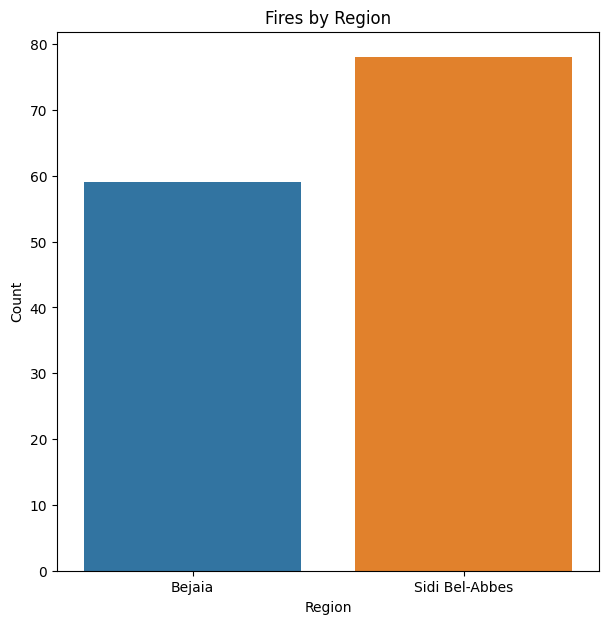

In [54]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Region', y='Count', data=fires_dataframe)

# Customize the plot
plt.title('Fires by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [55]:
months={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
data_copy["month"]=data['month'].apply(lambda x : months[x])

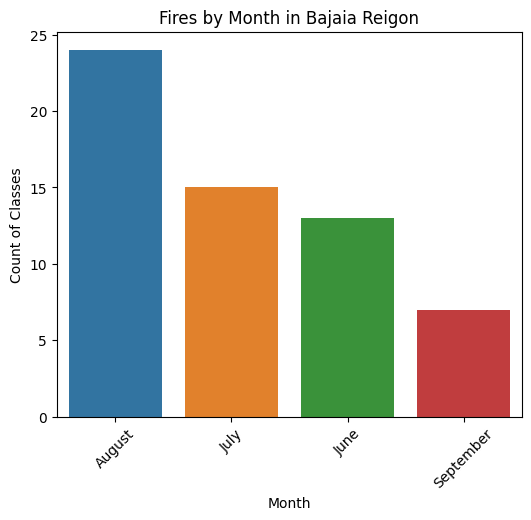

In [145]:
# Count 'Classes' where 'Reigon' is 0, grouped by 'month' and 'Classes'
result1 = data_copy[data_copy['Reigon'] == 0].groupby(['month', 'Classes']).size().reset_index(name='Count')
result1=result1[result1['Classes']=='1']
# Create the bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x='month', y='Count', data=result1)

# Customize the plot
plt.title('Fires by Month in Bajaia Reigon')
plt.xlabel('Month')
plt.ylabel('Count of Classes')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


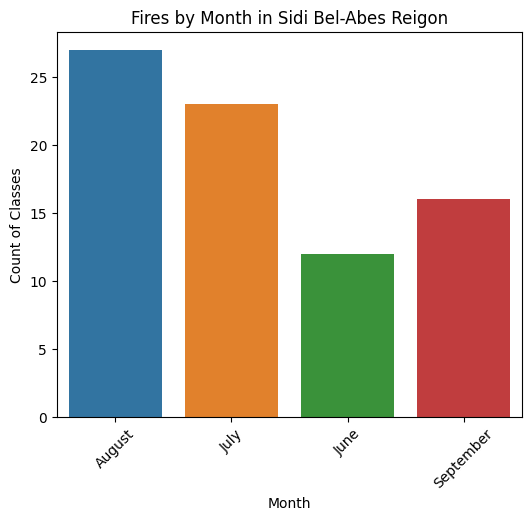

In [146]:
# Count 'Classes' where 'Reigon' is 0, grouped by 'month' and 'Classes'
result2 = data_copy[data_copy['Reigon'] == 1].groupby(['month', 'Classes']).size().reset_index(name='Count')
result2=result2[result2['Classes']=='1']
# Create the bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x='month', y='Count', data=result2)

# Customize the plot
plt.title('Fires by Month in Sidi Bel-Abes Reigon')
plt.xlabel('Month')
plt.ylabel('Count of Classes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12560\1736960551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_copy.corr()


<Axes: >

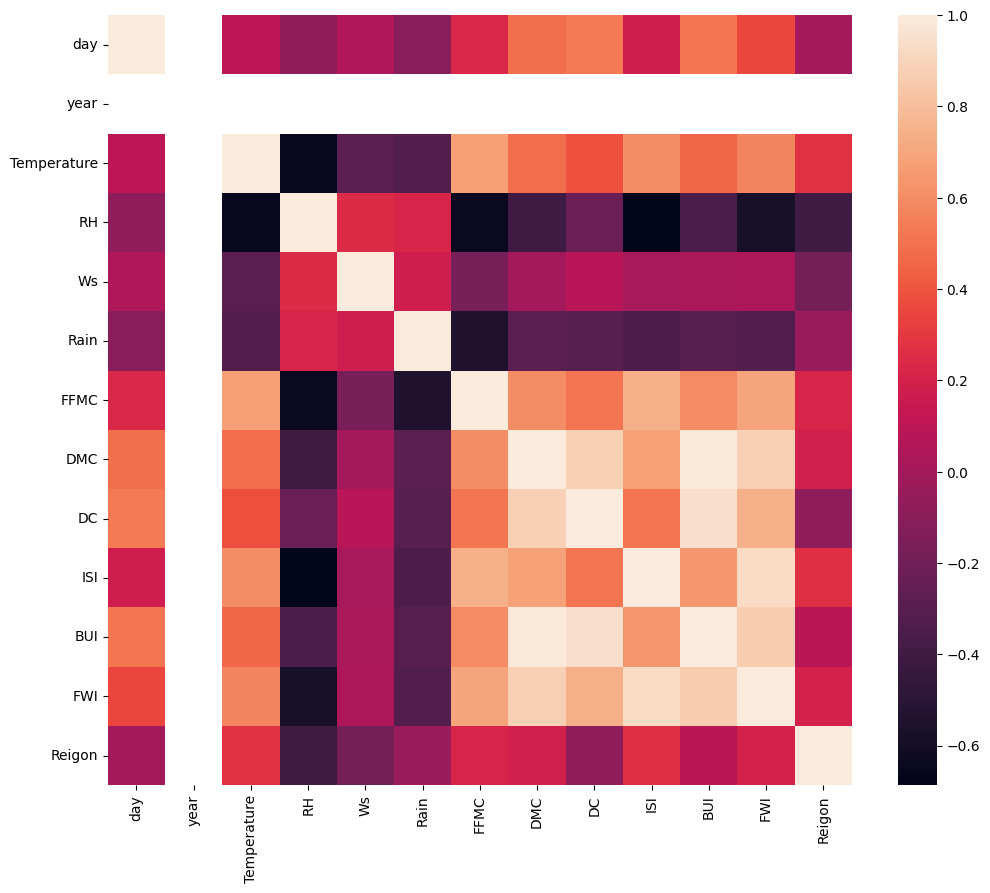

In [155]:
corr_matrix = data_copy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)